In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

penguins = pd.read_csv('penguins.csv')
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [2]:
print(penguins.head())

print(penguins.info())

print(penguins.isnull().sum())

   CulmenLength  CulmenDepth  FlipperLength  BodyMass  Species
0          39.1         18.7          181.0    3750.0        0
1          39.5         17.4          186.0    3800.0        0
2          40.3         18.0          195.0    3250.0        0
3           NaN          NaN            NaN       NaN        0
4          36.7         19.3          193.0    3450.0        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB
None
CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64


Species
0    152
1    124
2     68
Name: count, dtype: int64


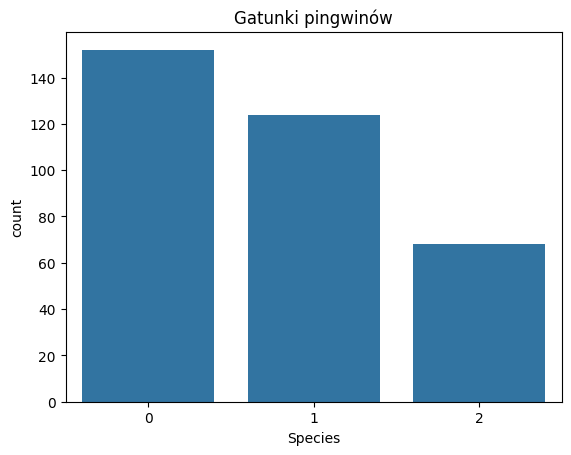

In [4]:
print(penguins['Species'].value_counts())

sns.countplot(data=penguins, x='Species')
plt.title('Gatunki pingwinów')
plt.show()

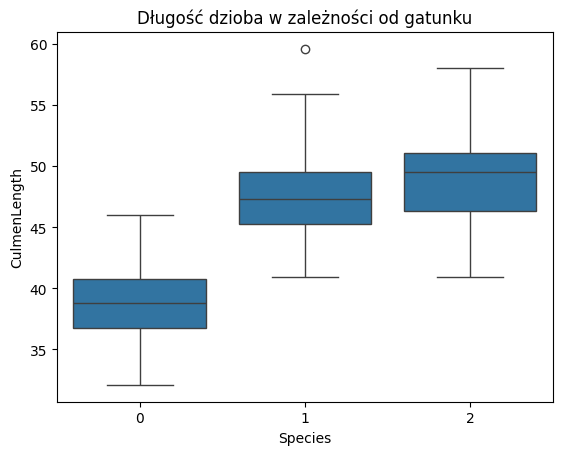

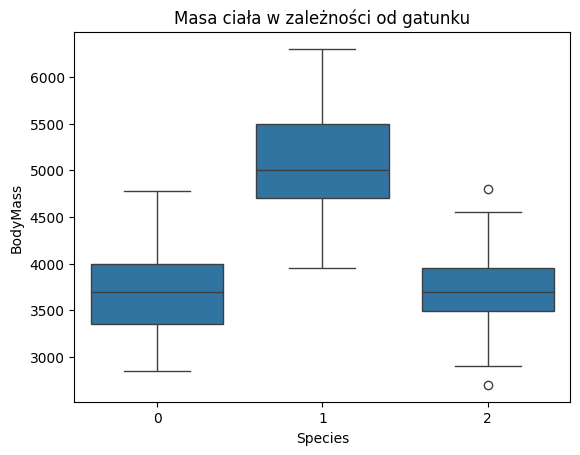

In [5]:
sns.boxplot(data=penguins, x='Species', y='CulmenLength')
plt.title('Długość dzioba w zależności od gatunku')
plt.show()

sns.boxplot(data=penguins, x='Species', y='BodyMass')
plt.title('Masa ciała w zależności od gatunku')
plt.show()


In [6]:
penguins = penguins.dropna()

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
penguins.loc[:, 'Species'] = encoder.fit_transform(penguins['Species'])

X = penguins.drop('Species', axis=1)
y = penguins['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Rozmiar zbioru treningowego: {X_train.shape}')
print(f'Rozmiar zbioru testowego: {X_test.shape}')

Rozmiar zbioru treningowego: (273, 4)
Rozmiar zbioru testowego: (69, 4)


In [7]:
binary_penguins = penguins[penguins['Species'].isin([0, 1])]

X = binary_penguins.drop('Species', axis=1)
y = binary_penguins['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Trening modelu i ocena

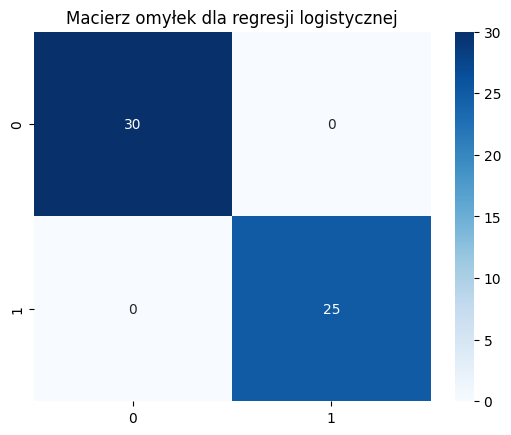

Dokładność modelu: 1.00


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Macierz omyłek dla regresji logistycznej')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność modelu: {accuracy:.2f}')

Klasyfikatory

In [9]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('KNN - raport klasyfikacji:')
print(classification_report(y_test, y_pred_knn))

KNN - raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        30
           1       0.86      1.00      0.93        25

    accuracy                           0.93        55
   macro avg       0.93      0.93      0.93        55
weighted avg       0.94      0.93      0.93        55



In [10]:
# Drzewo decyzyjne
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print('Drzewo decyzyjne - raport klasyfikacji:')
print(classification_report(y_test, y_pred_tree))

Drzewo decyzyjne - raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



In [11]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print('Random Forest - raport klasyfikacji:')
print(classification_report(y_test, y_pred_forest))

Random Forest - raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



In [12]:
# SVM 

from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print('SVM - raport klasyfikacji:')
print(classification_report(y_test, y_pred_svm))

SVM - raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.83      0.96      0.89        25

    accuracy                           0.89        55
   macro avg       0.89      0.90      0.89        55
weighted avg       0.90      0.89      0.89        55



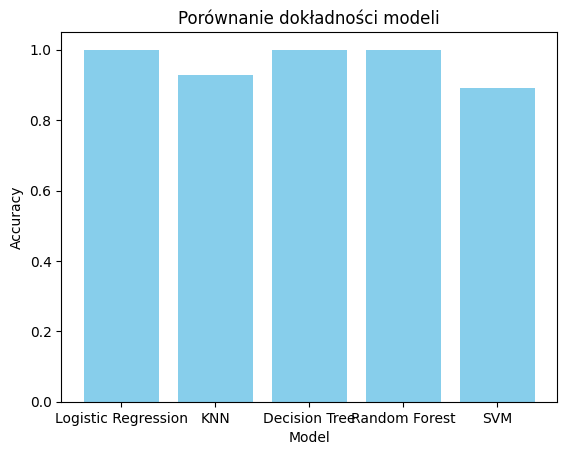

In [13]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_forest),
    accuracy_score(y_test, y_pred_svm)
]

plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Porównanie dokładności modeli')
plt.show()

In [17]:
print('Logistic Regression - raport klasyfikacji:')
print(classification_report(y_test, y_pred))

print('KNN - raport klasyfikacji:')
print(classification_report(y_test, y_pred_knn))

print('Drzewo decyzyjne - raport klasyfikacji:')
print(classification_report(y_test, y_pred_tree))

print('Random Forest - raport klasyfikacji:')
print(classification_report(y_test, y_pred_forest))

print('SVM - raport klasyfikacji:')
print(classification_report(y_test, y_pred_svm))

print("Logistic Regression Analysis:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision']:.2f}")
print(f"Recall: {classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']:.2f}")
print(f"F1-score: {classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']:.2f}")

print("\nKNN Analysis:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precision: {classification_report(y_test, y_pred_knn, output_dict=True)['weighted avg']['precision']:.2f}")
print(f"Recall: {classification_report(y_test, y_pred_knn, output_dict=True)['weighted avg']['recall']:.2f}")
print(f"F1-score: {classification_report(y_test, y_pred_knn, output_dict=True)['weighted avg']['f1-score']:.2f}")

print("\nDecision Tree Analysis:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print(f"Precision: {classification_report(y_test, y_pred_tree, output_dict=True)['weighted avg']['precision']:.2f}")
print(f"Recall: {classification_report(y_test, y_pred_tree, output_dict=True)['weighted avg']['recall']:.2f}")
print(f"F1-score: {classification_report(y_test, y_pred_tree, output_dict=True)['weighted avg']['f1-score']:.2f}")

print("\nRandom Forest Analysis:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest):.2f}")
print(f"Precision: {classification_report(y_test, y_pred_forest, output_dict=True)['weighted avg']['precision']:.2f}")
print(f"Recall: {classification_report(y_test, y_pred_forest, output_dict=True)['weighted avg']['recall']:.2f}")
print(f"F1-score: {classification_report(y_test, y_pred_forest, output_dict=True)['weighted avg']['f1-score']:.2f}")

# SVM
print("\nSVM Analysis:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"Precision: {classification_report(y_test, y_pred_svm, output_dict=True)['weighted avg']['precision']:.2f}")
print(f"Recall: {classification_report(y_test, y_pred_svm, output_dict=True)['weighted avg']['recall']:.2f}")
print(f"F1-score: {classification_report(y_test, y_pred_svm, output_dict=True)['weighted avg']['f1-score']:.2f}")

Logistic Regression - raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

KNN - raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        30
           1       0.86      1.00      0.93        25

    accuracy                           0.93        55
   macro avg       0.93      0.93      0.93        55
weighted avg       0.94      0.93      0.93        55

Drzewo decyzyjne - raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg      

Analizując wyniki klasyfikacji dla różnych modeli, możemy zauważyć znaczące różnice w ich dokładności i wynikach miar oceny klasyfikacji. Przyjrzymy się szczegółowo każdemu modelowi:

1. Logistic Regression
Dokładność: 1.00

Precyzja: 1.00

Recall: 1.00

F1-score: 1.00

Model regresji logistycznej osiągnął perfekcyjne wyniki, uzyskując dokładność, precyzję, recall i F1-score na poziomie 1.00 dla obu klas. Oznacza to, że model prawidłowo klasyfikował wszystkie przypadki, bez żadnych błędów klasyfikacyjnych. Jest to wynik bardzo pozytywny, który wskazuje na bardzo dobrą dopasowanie modelu do danych.

2. K-Nearest Neighbors (KNN)
Dokładność: 0.93

Precyzja: 0.94

Recall: 0.93

F1-score: 0.93

Model KNN osiągnął nieco gorsze wyniki niż regresja logistyczna, ale nadal jest to bardzo dobry rezultat. Zauważalna różnica polega na tym, że recall dla klasy 0 jest nieco niższy (0.87), co sugeruje, że model miał pewne trudności z identyfikowaniem tej klasy, mimo wysokiej precyzji. Dla klasy 1 recall jest idealny (1.00), co oznacza, że model dobrze identyfikuje przypadki tej klasy.

3. Decision Tree
Dokładność: 1.00

Precyzja: 1.00

Recall: 1.00

F1-score: 1.00

Drzewo decyzyjne uzyskało wyniki takie same jak regresja logistyczna, czyli perfekcyjne. Wszystkie miary są równe 1.00, co oznacza, że drzewo decyzyjne również bardzo dobrze dopasowało się do danych. Model ten skutecznie klasyfikuje wszystkie przypadki bez pomyłek, co sugeruje, że dane są łatwe do rozróżnienia za pomocą tej metody.

4. Random Forest
Dokładność: 1.00

Precyzja: 1.00

Recall: 1.00

F1-score: 1.00

Model Random Forest również osiągnął perfekcyjne wyniki, z dokładnością, precyzją, recall i F1-score na poziomie 1.00 dla obu klas. Random Forest to model zespołowy, który łączy wyniki wielu drzew decyzyjnych, co sprawia, że jest bardziej odporny na overfitting, co w tym przypadku pozwoliło na osiągnięcie doskonałych wyników.

5. Support Vector Machine (SVM)
Dokładność: 0.89

Precyzja: 0.90

Recall: 0.89

F1-score: 0.89

Model SVM osiągnął nieco gorsze wyniki w porównaniu do innych modeli, z dokładnością wynoszącą 0.89. Zauważalna różnica występuje w precyzji i recall dla klasy 0, które są nieco niższe niż w przypadku innych modeli. Mimo to, wyniki te są nadal bardzo dobre, co świadczy o tym, że model SVM dobrze radzi sobie z klasyfikacją, choć nie jest aż tak perfekcyjny jak regresja logistyczna, drzewo decyzyjne czy Random Forest.

Podsumowanie:
Logistic Regression, Decision Tree, i Random Forest wykazały się doskonałymi wynikami, osiągając 100% dokładności, precyzji, recall i F1-score, co wskazuje na bardzo dobrą jakość klasyfikacji.

KNN uzyskał wyniki na poziomie 93%, z nieco niższą skutecznością w klasyfikacji klasy 0, ale nadal osiągając bardzo dobre rezultaty.

SVM osiągnął najniższą dokładność (0.89), jednak nadal pozostaje bardzo solidnym modelem klasyfikacyjnym, choć z pewnymi trudnościami przy identyfikacji klasy 0.

W kontekście tego zadania, Logistic Regression, Decision Tree, i Random Forest są najbardziej odpowiednie, ze względu na ich doskonałą skuteczność. Jeśli zależy Ci na stabilności modelu i odporności na overfitting, warto rozważyć Random Forest jako najlepszy wybór. SVM może wymagać dalszej finezji w dostosowywaniu parametrów, aby uzyskać lepsze wyniki.